# Nhập môn Khoa học dữ liệu - Đồ án nhóm 2

### Danh sách thành viên

|Họ và tên|MSSV|Công việc|
| :------ | :---: | :--------- |
|Võ Thành Nam|19120301|Mục III|
|Lương Ánh Nguyệt|19120315|Mục IV|
|Phạm Lưu Mỹ Phúc|19120331|Mục II|
|Bùi Quang Bảo|19120454|Mục I|

### Nội dung và phân công cụ thể:

I. Mối quan hệ giữa độ dài, thể loại và mức độ yêu thích của một bài hát (19120454 - Bùi Quang Bảo)
* Liệu độ dài bài hát (duration) càng lớn thì bài hát đó có càng được yêu thích? Nếu không, liệu có tồn tại một "độ dài lý tưởng" khiến cho khả năng bài hát được yêu thích cao hơn không?
* Những thể loại nhạc nào phổ biến trên SoundCloud? Thể loại nhạc nào được phần đông người nghe yêu thích nhất? Giữa thể loại Hip Hop và thể loại Pop thì thể loại nào được ưa chuộng hơn?

II. Mối quan hệ giữa số lượt nghe, độ yêu thích và thể loại (19120331 - Phạm Lưu Mỹ Phúc)
* Một bài hát được nghe nhiều lần sẽ có nhiều lượt thích không?
* Thể loại có nhiều bài hát nhất có phải sẽ được nghe nhiều nhất hay không? 

III. Mối liên hệ giữa lượng follower của một user và số lượng lượt thích trung bình mỗi playlist của user đó (19120301 - Võ Thành Nam)
* Liệu số lượng follower có nói lên điều gì chất lượng các playlist của một user, và nếu có thì điều đó là gì? (Chất lượng ở đây không phải là chất lượng về mặt chuyên môn, mà là về sự yêu thích của mọi người dành cho playlist đó)

IV. Mối quan hệ giữa thời gian đăng, mức độ tương tác và số lượt nghe của bài hát (19120315 - Lương Ánh Nguyệt)
* Một bài hát có thời gian đăng đã lâu thì có nhiều lượt tương tác hơn bài hát mới được đăng gần đây hay không? Có khoảng thời gian nào mà những bài hát được đăng vào thời điểm đó có lượng tương tác cao hơn những bài hát được đăng vào thời điểm khác không?
* Một bài hát được repost (share lại) nhiều thì có giúp bài hát đó có nhiều lượt nghe hơn không?



### Nhập thư viện

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
from datetime import datetime
import sys
sys.executable

'/usr/bin/python3'

## **I. Mối quan hệ giữa độ dài, thể loại và mức độ yêu thích của một bài hát**

1. Liệu độ dài bài hát (duration) càng lớn thì bài hát đó có càng được yêu thích? Nếu không, liệu có tồn tại một "độ dài lý tưởng" khiến cho khả năng bài hát được yêu thích cao hơn không?

2. Những thể loại nhạc nào phổ biến trên SoundCloud? Thể loại nhạc nào được phần đông người nghe yêu thích nhất? Giữa thể loại Hip Hop và thể loại Pop thì thể loại nào được ưa chuộng hơn?

Thực hiện: Bùi Quang Bảo - 19120454

Dữ liệu sử dụng: tracks.csv (từ đồ án 1, phương pháp API)

Kết luận trong bài làm là kết luận đối với mẫu thu thập được trên nền tảng nghe nhạc SoundCloud, không đảm bảo phản ánh đúng toàn bộ nền tảng SoundCloud nói riêng và toàn bộ thị trường âm nhạc nói chung.

### Nhập dữ liệu

In [2]:
df = pd.read_csv('data/tracks.csv')
df.head()

,id,title,artwork_url,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,kind,label_name,last_modified,license,likes_count,permalink,permalink_url,playback_count,public,publisher_metadata,purchase_title,purchase_url,release_date,reposts_count,secret_token,sharing,state,streamable,tag_list,track_format,uri,urn,user_id,visuals,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy,user
0,226690288,"Rain Sounds - Sound Of Rain Nature Sounds, Rai...",https://i1.sndcdn.com/artworks-000175332551-ed...,NaN,True,771.0,2015-10-03T05:10:51Z,Sounds of rainfall with a cool space picture. ...,False,0.0,3609911,3609911,all,Rain,False,track,NaN,2021-08-24T07:05:34Z,all-rights-reserved,17256.0,rain-sounds-sound-of-rain-mp3-nature-soundsrai...,https://soundcloud.com/pineapplealien/rain-sou...,2319265.0,True,"{'id': 226690288, 'urn': 'soundcloud:tracks:22...",NaN,NaN,NaN,1236,NaN,public,finished,True,"turd monkeyfist rain ambient white noise ""whit...",single-track,https://api.soundcloud.com/tracks/226690288,soundcloud:tracks:226690288,123834756,NaN,https://wave.sndcdn.com/E4c0Gu2NfHm6_m.json,2015-10-03T05:10:51Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:226...,track-stations:226690288,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,BLACKBOX,MONETIZE,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
1,326671907,Ocean Waves 4 - Ocean Waves Natural White Nois...,https://i1.sndcdn.com/artworks-bZJG5aa0IZyZ-0-...,NaN,True,3.0,2017-06-06T16:50:10Z,NaN,False,0.0,3868026,3868026,all,World,False,track,Equilibrium,2017-06-06T16:53:36Z,all-rights-reserved,1030.0,ocean-waves-4-ocean-waves,https://soundcloud.com/sonidosdelanaturalezare...,229768.0,True,"{'id': 326671907, 'urn': 'soundcloud:tracks:32...",NaN,NaN,2011-02-16T00:00:00Z,16,NaN,public,finished,True,"Instrumental ""New Age""",single-track,https://api.soundcloud.com/tracks/326671907,soundcloud:tracks:326671907,311526979,NaN,https://wave.sndcdn.com/cRd1WjKS0uPz_m.json,2011-02-16T00:00:00Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:326...,track-stations:326671907,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,AD_SUPPORTED,MONETIZE,{'avatar_url': 'https://a1.sndcdn.com/images/d...
2,229953143,SOM DE CHUVA SOUND OF RAIN RELAX 30 MINUTES [B...,https://i1.sndcdn.com/artworks-000133852055-27...,NaN,True,900.0,2015-10-25T02:13:50Z,NaN,False,0.0,2066949,2066949,all,NaN,False,track,NaN,2021-09-11T08:02:44Z,all-rights-reserved,13982.0,som-de-chuva-sound-of-rain,https://soundcloud.com/lyssonastos/som-de-chuv...,1945725.0,True,NaN,NaN,NaN,NaN,995,NaN,public,finished,True,soundcloud:source=android-3rdparty-upload,single-track,https://api.soundcloud.com/tracks/229953143,soundcloud:tracks:229953143,109922318,NaN,https://wave.sndcdn.com/GYyQoGYiXnwX_m.json,2015-10-25T02:13:50Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:229...,track-stations:229953143,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
3,6768788,Sound of Rain,https://i1.sndcdn.com/artworks-000002938007-9e...,NaN,True,275.0,2010-11-07T01:36:05Z,Sleep better and relax with the sound of rain.,False,0.0,2063230,2063230,all,Effect,False,track,NaN,2021-10-21T01:22:33Z,all-rights-reserved,12002.0,sound-of-rain,https://soundcloud.com/irobert_ro/sound-of-rain,1611617.0,True,NaN,NaN,NaN,NaN,1096,NaN,public,finished,True,Sound of Rain Sleep better and relax DrogulPer...,single-track,https://api.soundcloud.com/tracks/6768788,soundcloud:tracks:6768788,1991518,NaN,https://wave.sndcdn.com/fY87ipEt5bUp_m.json,2010-11-07T01:36:05Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:676...,track-stations:6768788,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO.

Chỉ giữ lại những thuộc tính mà chúng ta cần sử dụng: "genre", "duration" và "likes_count".

In [3]:
df = df.loc[:,["genre", "duration", "likes_count"]]
df.fillna(df.median(), inplace=True)

In [4]:
plt.style.use('ggplot')

### Mối quan hệ giữa độ dài (duration) và mức độ yêu thích (likes_count) của 1 bài hát

Hãy cùng xem qua biểu đồ phân tán giữa 2 thuộc tính duration và likes_count:

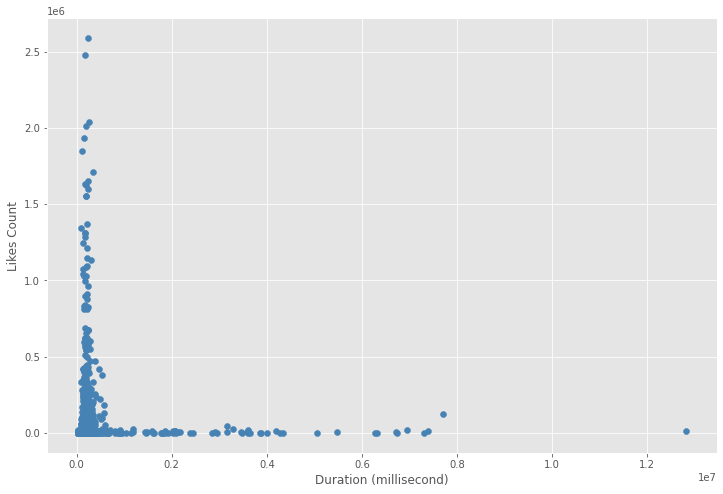

In [5]:
# Scatter Plot: duration vs likes_count
fig = plt.figure(figsize=(12,8))
plt.scatter(df["duration"], df["likes_count"], c='steelblue')
plt.xlabel('Duration (millisecond)')
plt.ylabel('Likes Count')
plt.show()

Với biểu đồ phân tán như trên, rất khó quan sát và chúng ta không thể đưa ra kết luận nào. Lí do là bởi tồn tại những track có độ dài (duration) lớn khác thường khiến cho đuôi của biểu đồ lệch sang bên phải rất nhiều.

Giải pháp: Chúng ta sẽ tiến hành loại bỏ outliers.

Outliers trong trường hợp này, được xác định là:
* Những track có độ dài lớn khác thường (ví dụ như [track này](https://soundcloud.com/pineapplealien/rain-sounds-sound-of-rain-mp3-nature-soundsrain-sound-white-noise-for-relaxation-meditation), không phải 1 bài hát mà chỉ đơn thuần là âm thanh tiếng mưa dùng để thư giãn, có độ dài hơn 1 giờ)
* Những track có độ dài ngắn bất thường, không phải bài hát mà là sound effects (SFX) hoặc audio do người dùng đăng lên (SoundCloud cho phép người dùng đăng audio của họ, sẽ tồn tại những track không phải bài hát mà chỉ do người dùng đăng thử lên "cho vui" và quên xoá)

Phương pháp: Interquartile Range Method (IQR)

Tham khảo: https://online.stat.psu.edu/stat200/lesson/3/3.2

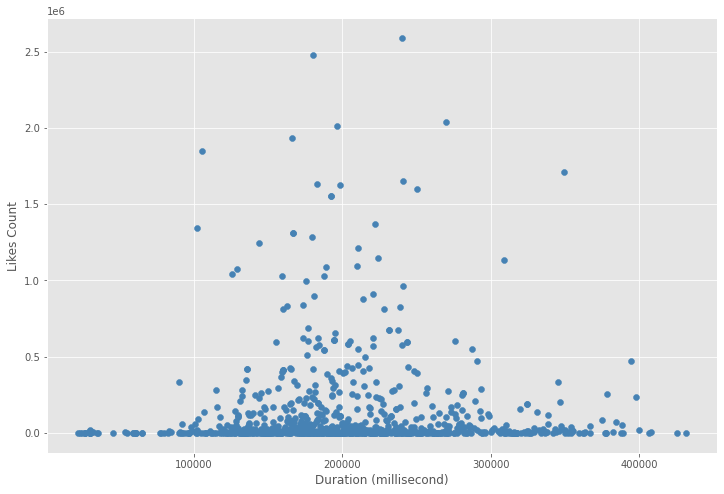

In [6]:
# Remove outliers: Interquartile Range Method (IQR)
Q1, Q3 = df["duration"].quantile(0.25), df["duration"].quantile(0.75)
IQR = Q3 - Q1
cut_off = IQR * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
df = df[~((df["duration"] < lower) | (df["duration"] > upper))]

# Scatter Plot: duration vs likes_count
fig = plt.figure(figsize=(12,8))
plt.scatter(df["duration"], df["likes_count"], c='steelblue')
plt.xlabel('Duration (millisecond)')
plt.ylabel('Likes Count')
plt.show()

Với biểu đồ phân tán của dữ liệu sau khi loại bỏ outliers, chúng ta có thể đưa ra một vài quan sát và nhận xét như sau:

* **Bài hát có độ dài lớn hơn không có nghĩa là bài hát đó được yêu thích hơn.** Điều này đã trả lời cho câu hỏi: "Liệu độ dài bài hát (duration) càng lớn thì bài hát đó có càng được yêu thích?"

* Phần lớn những bài hát có số lượng like lớn có độ dài nằm trong khoảng từ 100000ms (1 phút 40 giây) đến 300000ms (5 phút). Bằng quan sát, chúng ta nhận thấy rằng **những bài hát có số lượng like lớn có độ dài xoay quanh 200000ms (3 phút 20 giây)**. Điều này khá đúng với thực tế khi mà những bài hát mới ra *thường* dài từ 3 đến 4 phút. Tuy nhiên, vẫn **không** thể kết luận đây là "độ dài lý tưởng" để một bài hát được yêu thích hơn, bởi vì một bài hát hay còn phụ thuộc vào rất nhiều yếu tố khác, và chúng ta chỉ đang xét 1 mẫu các bài hát trên nền tảng SoundCloud (So với Spotify thì SoundCloud có rất nhiều nghệ sĩ tự do, không chuyên, cũng có thể ảnh hưởng đến kết luận này).

### Sự phổ biến (số lượng bài hát) và độ ưa chuộng (số lượng likes) đối với các thể loại nhạc

Hãy cùng xem qua các thể loại âm nhạc (genre):

In [7]:
print(f"Số lượng thể loại: {len(df['genre'].unique())}")
print("Danh sách thể loại:")
print(df['genre'].unique())

Số lượng thể loại: 208
Danh sách thể loại:
[nan 'Lo-Fi Hip Hop' 'rain' 'Lo-fi' 'beats' 'Drum & Bass' 'Hip Hop'
 'fast and furious' 'Hip-hop & Rap' 'Comedy' 'Pop' 'Dance & EDM' 'Phonk'
 'Jazz' 'Electro Swing' 'Alternative Rock' 'Indie' 'Electronic' 'PHONK'
 'KREEP' 'Metal' 'Soundtrack' 'Rock' 'experimental' 'Country'
 'Rap/Hip Hop' 'Classical' 'Rap' 'R&B' 'R & B' 'R&B/Soul' 'NC' 'Lexington'
 'meme' 'Undertale - Last Breath' 'Trailer Music' 'Hardstyle' 'cover'
 'Speaker Knockerz' 'All' 'two against one' 'Irish Drill Music'
 'irishdrillmusic' 'K-Pop' 'R&B & Soul' 'calvin' 'martin solveig'
 'Progressive House' 'Dance' 'steveaoki' 'House' 'XO' 'good vibes'
 'Indie Trap' 'Real Music' 'Anime' 'Tech House' 'funk' 'Baile do ana'
 'Rap/Hip-Hop' 'The Neighbourhood, ' 'Hip-hop/Rap' '"the system' 'other'
 'Ballad' 'driven to tears' 'Light' 'Shere Khan' 'Música do Mundo'
 'Reggae' 'Pop-Folk' 'Funk' 'Singer Songwriter' 'STP' 'BlueOysterCult '
 'Melody' 'GalaxyHop' 'Dance/HipHop' 'country' 'rock n rol

Chúng ta đang gặp phải 1 vấn đề là: SoundCloud cho phép người dùng tự định nghĩa thể loại âm nhạc cho track của mình, vì thế ở mẫu xuất hiện rất nhiều các thể loại "lạ" (ví dụ như "Real Music" hay "Pokemon Gold").

Ngoài ra, một số thể loại còn được viết với những cách viết khác, ví dụ như: "Hip-hop & Rap" và "Rap/Hip Hop".

Vì thế ở khuôn khổ đồ án này, chúng ta sẽ chỉ xem xét 10 thể loại phổ biến nhất, khi tính toán sẽ không xét đến ý nghĩa, và coi những thể loại như "Hip-hop & Rap" và "Hip Hop" là những thể loại khác nhau.

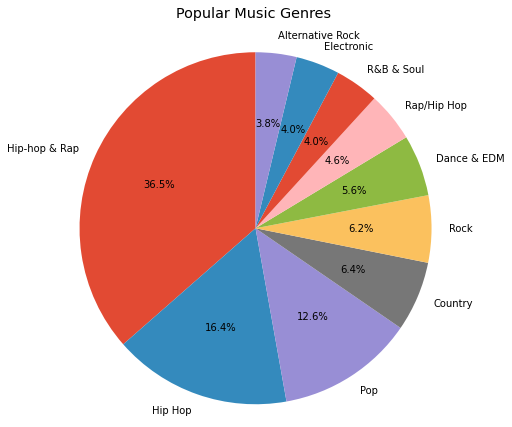

In [8]:
# Value Count
popular_genres_and_count = df['genre'].value_counts()[:10]
popular_genres = popular_genres_and_count.index.tolist()

# Pie plot: Genres with count
fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(7)
ax.pie(list(popular_genres_and_count), labels=popular_genres, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Popular Music Genres', y=1.04)
plt.show()

Chúng ta có thể thấy rõ rằng **thể loại Hip-hop (nói chung) khá phổ biến và chiếm tỉ trọng lớn trong số các bài hát**.

Tuy nhiên, liệu phổ biến hơn thì có được yêu thích/ưa chuộng hơn?

Ở đây, chúng ta sẽ xem xét mức độ yêu thích của 1 thể loại thông qua giá trị trung vị (median) của thuộc tính "likes_count" của tất cả các bài hát thuộc thể loại đó.

In [9]:
loved_genres = df[["genre", "likes_count"]][df["genre"].isin(popular_genres)].groupby('genre').agg('median').sort_values(
	by = "likes_count",
	ascending = False
)
loved_genres = loved_genres.reset_index()
loved_genres = loved_genres.rename({'genre': 'Music Genre', 'likes_count': 'Median Likes Count'}, axis=1)

loved_genres

,Music Genre,Median Likes Count
0,Rap/Hip Hop,408805.0
1,Hip Hop,109990.0
2,Hip-hop & Rap,51125.0
3,Country,9130.0
4,Alternative Rock,8793.0
5,Rock,7867.0
6,Pop,6194.0
7,Electronic,5604.0
8,R&B & Soul,4385.0
9,Dance & EDM,3654.0


Chúng ta có thể đưa ra một số nhận xét như sau:

* Thể loại Pop dù phổ biến, có nhiều bài hát hơn Rock và Country nhưng lại không được yêu thích bằng.

* **Thể loại Hip-hop (nói chung) vừa phổ biến nhất, vừa được yêu thích nhất.**

* Chúng ta cũng thấy được rằng, **giữa thể loại Hip Hop và thể loại Pop thì thể loại Hip Hop được ưa chuộng hơn**.

Hãy cùng xem lại biểu đồ phân tán, nhưng lần này bài hát thuộc thể loại Hip Hop sẽ có màu đỏ và bài hát thuộc thể loại Pop sẽ có màu xanh:

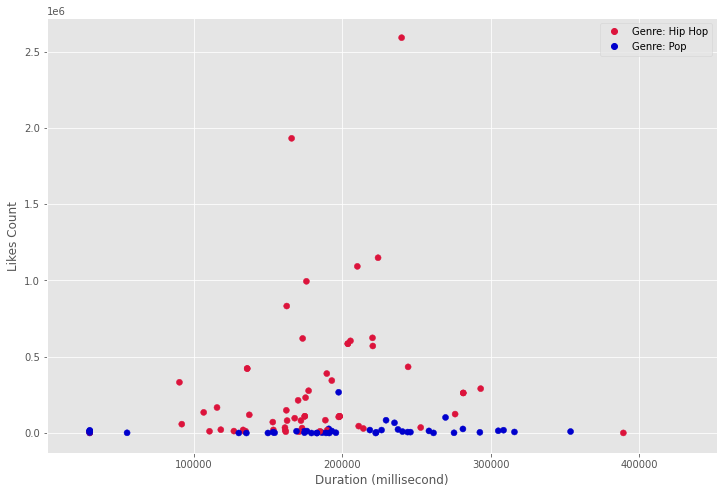

In [10]:
colors = []
for lab, row in df.iterrows() :
    if row["genre"] == "Hip Hop":
        colors.append("crimson") # red
    elif row["genre"] == "Pop":
        colors.append("mediumblue") # blue
    else:
        colors.append("None")

# Scatter Plot: duration vs likes_count, red is Hip Hop and blue is Pop
fig = plt.figure(figsize=(12,8))
plt.scatter(df["duration"], df["likes_count"], c=colors)
plt.xlabel('Duration (millisecond)')
plt.ylabel('Likes Count')
red_dot = mlines.Line2D([], [], color='crimson', marker='o', linestyle='None', markersize=6, label='Genre: Hip Hop')
blue_dot = mlines.Line2D([], [], color='mediumblue', marker='o', linestyle='None', markersize=6, label='Genre: Pop')
plt.legend(handles=[red_dot, blue_dot], loc = 'upper right')
plt.show()

Đúng với kết luận ở trên, những bài hát thuộc thể loại Hip Hop (màu đỏ) thường được yêu thích hơn những bài hát thuộc thể loại Pop (màu xanh).

### Kết luận:

* Liệu độ dài bài hát (duration) càng lớn thì bài hát đó có càng được yêu thích?
  * Trả lời: Không. Bài hát có độ dài lớn hơn không có nghĩa là bài hát đó được yêu thích hơn.

* Liệu có tồn tại một "độ dài lý tưởng" khiến cho khả năng bài hát được yêu thích cao hơn không?
  * Trả lời: Có thể. Ở mẫu đang xét, những bài hát có số lượng like lớn có độ dài xoay quanh 3 phút 20 giây. Tuy nhiên mẫu khá nhỏ nên đây không phải là kết luận.

* Những thể loại nhạc nào phổ biến trên SoundCloud? 
  * Trả lời: Thể loại Hip Hop (nói chung) phổ biến nhất, theo sau đó là các thể loại như Pop, Country, Rock, Dance & EDM,...

* Thể loại nhạc nào được phần đông người nghe yêu thích nhất?
  * Trả lời: Thể loại Hip Hop (nói chung) được người nghe ưa chuộng nhất.

* Giữa thể loại Hip Hop và thể loại Pop thì thể loại nào được ưa chuộng hơn?
  * Trả lời: Thể loại Hip Hop.

## **II. Mối quan hệ giữa số lượt nghe, độ yêu thích và thể loại**
Câu hỏi:
1. Một bài hát được nghe nhiều lần sẽ có nhiều lượt thích hay không 
2. Thể loại có nhiều bài hát nhất có phải sẽ được nghe nhiều nhất hay không 

Người thực hiện: Phạm Lưu Mỹ Phúc - 19120331 

Dữ liệu sử dụng: track.csv (từ đồ án 1, phương pháp API)

Dữ liệu trong bài chỉ phản ánh trong mẫu được thu thập. Không thể thể hiện cho toàn bộ nền tảng Soundcloud hay thị trường âm nhạc

Các bước cần thực hiện:
* Nhập dữ liệu
* Tiền xử lý dữ liệu: xử lý các dòng dữ liệu thiếu 
* Tiến hành phân tích dữ liệu và trực quan hóa

In [11]:
df = pd.read_csv('data/tracks.csv')
print(df.shape)
df.head()

(1001, 48)


,id,title,artwork_url,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,kind,label_name,last_modified,license,likes_count,permalink,permalink_url,playback_count,public,publisher_metadata,purchase_title,purchase_url,release_date,reposts_count,secret_token,sharing,state,streamable,tag_list,track_format,uri,urn,user_id,visuals,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy,user
0,226690288,"Rain Sounds - Sound Of Rain Nature Sounds, Rai...",https://i1.sndcdn.com/artworks-000175332551-ed...,NaN,True,771.0,2015-10-03T05:10:51Z,Sounds of rainfall with a cool space picture. ...,False,0.0,3609911,3609911,all,Rain,False,track,NaN,2021-08-24T07:05:34Z,all-rights-reserved,17256.0,rain-sounds-sound-of-rain-mp3-nature-soundsrai...,https://soundcloud.com/pineapplealien/rain-sou...,2319265.0,True,"{'id': 226690288, 'urn': 'soundcloud:tracks:22...",NaN,NaN,NaN,1236,NaN,public,finished,True,"turd monkeyfist rain ambient white noise ""whit...",single-track,https://api.soundcloud.com/tracks/226690288,soundcloud:tracks:226690288,123834756,NaN,https://wave.sndcdn.com/E4c0Gu2NfHm6_m.json,2015-10-03T05:10:51Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:226...,track-stations:226690288,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,BLACKBOX,MONETIZE,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
1,326671907,Ocean Waves 4 - Ocean Waves Natural White Nois...,https://i1.sndcdn.com/artworks-bZJG5aa0IZyZ-0-...,NaN,True,3.0,2017-06-06T16:50:10Z,NaN,False,0.0,3868026,3868026,all,World,False,track,Equilibrium,2017-06-06T16:53:36Z,all-rights-reserved,1030.0,ocean-waves-4-ocean-waves,https://soundcloud.com/sonidosdelanaturalezare...,229768.0,True,"{'id': 326671907, 'urn': 'soundcloud:tracks:32...",NaN,NaN,2011-02-16T00:00:00Z,16,NaN,public,finished,True,"Instrumental ""New Age""",single-track,https://api.soundcloud.com/tracks/326671907,soundcloud:tracks:326671907,311526979,NaN,https://wave.sndcdn.com/cRd1WjKS0uPz_m.json,2011-02-16T00:00:00Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:326...,track-stations:326671907,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,AD_SUPPORTED,MONETIZE,{'avatar_url': 'https://a1.sndcdn.com/images/d...
2,229953143,SOM DE CHUVA SOUND OF RAIN RELAX 30 MINUTES [B...,https://i1.sndcdn.com/artworks-000133852055-27...,NaN,True,900.0,2015-10-25T02:13:50Z,NaN,False,0.0,2066949,2066949,all,NaN,False,track,NaN,2021-09-11T08:02:44Z,all-rights-reserved,13982.0,som-de-chuva-sound-of-rain,https://soundcloud.com/lyssonastos/som-de-chuv...,1945725.0,True,NaN,NaN,NaN,NaN,995,NaN,public,finished,True,soundcloud:source=android-3rdparty-upload,single-track,https://api.soundcloud.com/tracks/229953143,soundcloud:tracks:229953143,109922318,NaN,https://wave.sndcdn.com/GYyQoGYiXnwX_m.json,2015-10-25T02:13:50Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:229...,track-stations:229953143,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
3,6768788,Sound of Rain,https://i1.sndcdn.com/artworks-000002938007-9e...,NaN,True,275.0,2010-11-07T01:36:05Z,Sleep better and relax with the sound of rain.,False,0.0,2063230,2063230,all,Effect,False,track,NaN,2021-10-21T01:22:33Z,all-rights-reserved,12002.0,sound-of-rain,https://soundcloud.com/irobert_ro/sound-of-rain,1611617.0,True,NaN,NaN,NaN,NaN,1096,NaN,public,finished,True,Sound of Rain Sleep better and relax DrogulPer...,single-track,https://api.soundcloud.com/tracks/6768788,soundcloud:tracks:6768788,1991518,NaN,https://wave.sndcdn.com/fY87ipEt5bUp_m.json,2010-11-07T01:36:05Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:676...,track-stations:6768788,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO.

In [12]:
df = df.loc[:,["genre", "playback_count", "likes_count"]]
df = df.dropna()
df.shape

(760, 3)

Khi thực hiện xóa các dòng có dữ liệu là nan thì dữ liệu bị xóa 241 dòng (~25%), số lượng dòng còn lại vẫn chấp nhận được nên ta thực hiện phân tích trên tập dữ liệu còn lại mà không thay thế giá trị.

Trong phần này ta chỉ xét đến sự tương quan giữa số lượt nghe, độ yêu thích và thể loại nên chỉ cần lấy 3 cột `genre`, `playback_count` và `likes_count`

In [13]:
df.dtypes

genre              object
playback_count    float64
likes_count       float64
dtype: object

Kiểu dữ liệu của 3 cột ta đang xét đều đã phù hợp để thực hiện phân tích.

In [14]:
df.describe().round(1)

,playback_count,likes_count
count,760.0,760.0
mean,10310024.5,134810.9
std,26553052.4,318202.6
min,0.0,0.0
25%,69351.8,1266.0
50%,808444.5,13130.5
75%,6734789.0,106207.5
max,241070351.0,2591221.0


### Nhận xét chung các cột dữ liệu 
- Số lượt nghe ít nhất là 0 và nhiều nhất là ~241 triệu lượt. Như vậy tập dữ liệu ta đang xét được phân bố khá rộng và đầy đủ các loại người dùng từ phổ thông đến ca sĩ.
- Số lượt thích ít nhất là 0 và nhiều nhất là ~3 triệu lượt thích. 

### Mối quan hệ giữa số lượt nghe với độ yêu thích của bài hát 

In [15]:
plt.style.use('ggplot')

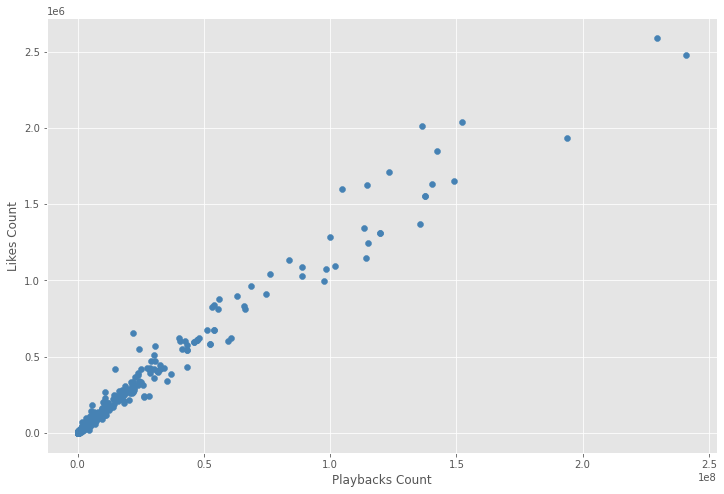

In [16]:
fig = plt.figure(figsize=(12,8))
plt.scatter(df["playback_count"], df["likes_count"], c='steelblue')
plt.xlabel('Playbacks Count')
plt.ylabel('Likes Count')
plt.show()

Với biểu đồ phân tán dữ liệu trên, ta có thể đưa ra vài nhận xét như sau:

* Bài hát được nghe càng nhiều thì lượt yêu thích cũng càng nhiều. Không có trường hợp bài hát có nhiều lượt nghe nhưng có ít lượt thích.

* Số lượt nghe tập trung nhiều ở  **<5000000** 

* Số lượng bài hát có lượt nghe **>15000000** không nhiều


### Mối quan hệ giữa thể loại và số lượt nghe của bài hát

Đầu tiên, ta tìm hiểu thể loại nào xuất hiện trong tập dữ liệu này.

In [17]:
df['genre'].unique()

array(['Rain', 'World', 'Effect', '*Rain ', 'Lo-Fi Hip Hop', 'rain',
       'Lo-fi', 'beats', 'Drum & Bass', 'Hip Hop', 'fast and furious',
       'Hip-hop & Rap', 'Comedy', 'Pop', 'Dance & EDM', 'Phonk', 'Jazz',
       'Electro Swing', 'Alternative Rock', 'Indie', 'Electronic',
       'PHONK', 'KREEP', 'Metal', 'Soundtrack', 'Rock', 'experimental',
       'Country', 'Rap/Hip Hop', 'Classical', 'Rap', 'R&B', 'R & B',
       'R&B/Soul', 'NC', 'Lexington', 'Avicii', 'meme',
       'Undertale - Last Breath', 'Trailer Music', 'Hardstyle', 'cover',
       'Speaker Knockerz', 'All', 'two against one', 'Irish Drill Music',
       'irishdrillmusic', 'K-Pop', 'ENHYPEN', 'R&B & Soul', 'calvin',
       'martin solveig', 'Progressive House', 'Dance', 'steveaoki',
       'House', 'XO', 'good vibes', 'Indie Trap', 'Real Music', 'Anime',
       'Reggaeton', 'Tech House', 'Afro House Deep House', 'funk',
       'Baile do ana', 'rap', 'Rap/Hip-Hop', 'The Neighbourhood, ',
       'Hip-hop/Rap', '"the sy

Do thể loại được tự định nghĩa nên phần thể loại xuất hiện nhiều thể loại lạ, ví dụ: "two against one", "shere khan". Vì vậy, ta chỉ lấy 10 thể loại phổ biến nhất (có nhiều bài hát) để phân tích và trả lời câu hỏi, liệu các thể loại phổ biến sẽ có nhiều lượt nghe hơn không?

In [18]:
genre_count = df['genre'].value_counts()[:10].index.tolist()
df['genre'].value_counts()[:10]

Hip-hop & Rap       137
Hip Hop              61
Pop                  47
Country              25
Rock                 23
Dance & EDM          22
Rap/Hip Hop          17
Electronic           17
R&B & Soul           15
Alternative Rock     14
Name: genre, dtype: int64

Thể loại Hip Hop nằm ở vị trí thứ 2 cũng có thể xem là một phần của thể loại Hip Hop & Rap vì thế có thể nhận xét rằng Hip Hop & Rap chiếm ưu thế hơn hẳn so với các thể loại còn lại.

Đây chỉ là nhận xét trên một mẫu thu thập được trên Soundcloud. Mẫu này không thể phản ánh thực tế trên toàn bộ  thị trường âm nhạc hiện nay. 

Tiếp theo, ta xét độ yêu thích của một thể loại thông qua giá trị trung bình (mean) của thuộc tính playback_count của tất cả bài hát thuộc thể loại này và trả lời câu hỏi liệu một thể loại phổ biến sẽ có nhiều lượt nghe hơn hay không. 

In [19]:
df_popular_genre = df.loc[df['genre'].isin(genre_count)]

df_genre_count=df_popular_genre['genre'].value_counts()
df_popular_genre = df_popular_genre.filter(items=['genre','playback_count']).groupby(by="genre").mean()

genre_playbackcount_df = pd.concat([df_popular_genre,df_genre_count],axis=1).sort_values(by=['playback_count'],ascending=False)
genre_playbackcount_df.rename(columns={'genre':'song_count'},inplace=True)


In [20]:
genre_playbackcount_df.astype({'playback_count': 'int64', 'song_count': 'int64'})

,playback_count,song_count
Rap/Hip Hop,39973899,17
Alternative Rock,36025806,14
Hip Hop,25609312,61
Hip-hop & Rap,16009142,137
R&B & Soul,11489763,15
Electronic,6446520,17
Dance & EDM,3747998,22
Country,1890433,25
Rock,1485705,23
Pop,1309403,47


Ta có thể đưa ra nhận xét như sau:
 * Thể loại Hip Hop & Rap vẫn chiếm ưu thế khi vừa có nhiều bài hát nhất và vừa có nhiều lượt nghe với số lượng vượt trội hơn các thể loại còn lại.
 
 * Thể loại Alternative Rock tuy có số lượng bài hát ít nhất nhưng lại có lượt nghe cao thứ 2 và chênh lệch rất lớn so với các thể loại còn lại.
 
 * Ngược lại, thể loại Pop có nhiều bài hát thứ 2 nhưng lại có số lượt nghe thấp nhất

Tiếp theo, ta trực quan hóa dữ liệu vừa được phân tích lên biểu đồ tròn bên dưới để dễ đưa ra nhận xét

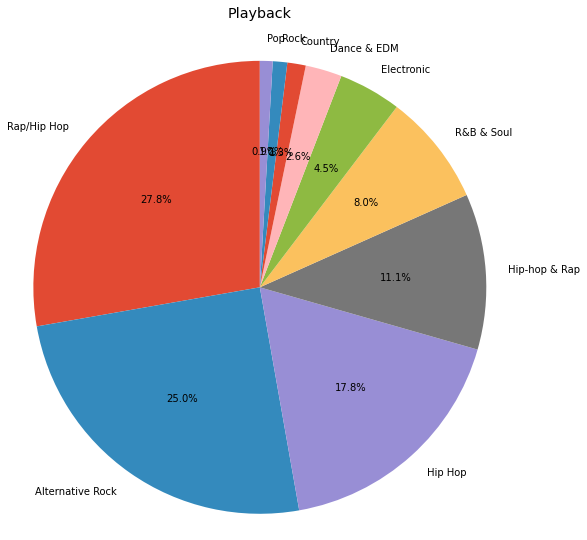

In [21]:
# Value Count
popular_genres_and_count = genre_playbackcount_df['playback_count']
popular_genres = genre_playbackcount_df.index.tolist()

# Pie plot: Genres with count
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(9)
ax.pie(list(popular_genres_and_count), labels=popular_genres, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Playback', y=1.04)
plt.show()

### Kết luận
1. Bài hát được nghe càng nhiều thì lượt yêu thích cũng càng nhiều:
    * Các bài hát càng có nhiều người nghe thì càng có nhiều lượt thích. Không có trường hợp bài hát có nhiều lượt nghe nhưng có ít lượt thích. 
    
2. Sau khi so sánh giữa số lượng bài hát (độ phổ biến) và số lượt nghe của các thể loại thì có thể rút ra kết luận:
    * Thể loại Hip Hop & Rock vừa có nhiều bài hát nhất vừa có nhiều lượt nghe nhất.
    
    * Một thể loại phổ biến (nhiều bài hát) không có nghĩ thể loại ấy sẽ có nhiều lượt nghe.
    
    * Có sự tương phản khi có nhiều thể loại dù phổ biến hơn nhưng lại có lượt nghe ít hơn so với thể loại ít phổ biến (ít bài hát hơn)
    

## **III. Trong phần này, ta sẽ tìm hiểu về mối liên hệ giữa lượng follower của một user và số lượng lượt thích trung bình mỗi playlist của user đó.**

Câu hỏi được đặt ra ở đây là: 
- Liệu số lượng follower có nói lên điều gì chất lượng các playlist của một user, và nếu có thì điều đó là gì? (Chất lượng ở đây không phải là chất lượng về mặt chuyên môn, mà là về sự yêu thích của mọi người dành cho playlist đó)

Bộ dữ liệu được sử dụng: users.csv

Để tính độ chất lượng của các playlist, ta tính số lượng lượt thích trung bình của các playlist.
> Lượt thích trung bình = Tổng số lượt thích các playlist / Tổng số playlist.

Các bước cần thực hiện:
- Nhập dữ liệu vào và xem xét các thông tin chung về dữ liệu (dữ liệu có bị thiếu hay có bất thường không, phân bố như thế nào,...)
- Thực hiện tiền xử lí: lọc loại bỏ các dữ liệu bất thường hoặc dữ liệu lỗi nếu có.
- Tiến hành phân tích bằng cách xem xét tương quan, các chỉ số và vẽ biểu đồ thể hiện các tương quan đó.

**Nhập dữ liệu vào**

In [22]:
users_df=pd.read_csv('data/users.csv')
users_df.head()

,id,permalink,username,avatar_url,city,comments_count,country_code,created_at,creator_subscriptions,creator_subscription,description,followers_count,followings_count,first_name,full_name,groups_count,kind,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,reposts_count,track_count,uri,urn,verified,visuals,badges,station_urn,station_permalink
0,917161864,buiquangbao,Bui Quang Bao,https://i1.sndcdn.com/avatars-BDstqyVzw7DgQ80k...,NaN,0,NaN,2020-12-07T01:53:40Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},NaN,1,2,Bao,Bao Bui Quang,0,user,2021-10-23T01:26:58Z,Bui Quang,71,2,https://soundcloud.com/buiquangbao,2,NaN,1,https://api.soundcloud.com/users/917161864,soundcloud:users:917161864,False,"{'urn': 'soundcloud:users:917161864', 'enabled...","{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:91...,artist-stations:917161864
1,917161870,user-580689793,RAVER,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,IT,2020-12-07T01:53:41Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},Not yet,2,6,NaN,NaN,0,user,2021-07-31T21:35:56Z,NaN,93,1,https://soundcloud.com/user-580689793,1,NaN,1,https://api.soundcloud.com/users/917161870,soundcloud:users:917161870,False,NaN,"{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:91...,artist-stations:917161870
2,917161903,yo-fav-niah,Yo.fav. niah,https://i1.sndcdn.com/avatars-000928304617-t7l...,NaN,0,NaN,2020-12-07T01:53:57Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},NaN,1,0,Yo.fav.,Yo.fav. niah,0,user,2020-12-07T01:53:58Z,niah,1,0,https://soundcloud.com/yo-fav-niah,1,NaN,0,https://api.soundcloud.com/users/917161903,soundcloud:users:917161903,False,NaN,"{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:91...,artist-stations:917161903
3,917161906,michael-anthoms,Anthmzs,https://i1.sndcdn.com/avatars-IMhr2nnrY7mamykh...,NaN,0,NaN,2020-12-07T01:53:57Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},NaN,3,1,Michael,Michael Anthoms,0,user,2020-12-07T02:02:59Z,Anthoms,1,0,https://soundcloud.com/michael-anthoms,2,NaN,13,https://api.soundcloud.com/users/917161906,soundcloud:users:917161906,False,NaN,"{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:91...,artist-stations:917161906
4,917161924,user-305625325,Jaydaa💕,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2020-12-07T01:54:01Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},NaN,2,72,NaN,NaN,0,user,2020-12-07T01:54:58Z,NaN,194,0,https://soundcloud.com/user-305625325,1,NaN,0,https://api.soundcloud.com/users/917161924,soundcloud:users:917161924,False,NaN,"{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:91...,artist-stations:917161924


Ta cần sử dụng các thuộc tính `followers_count, playlist_likes_count, playlist_count`, do đó ta chỉ lấy ra các cột dữ liệu này.

In [23]:
data=users_df.loc[:,['followers_count','playlist_likes_count','playlist_count']]

Xem các kiểu dữ liệu đã ở dạng số hết hay chưa.

In [24]:
data.dtypes

followers_count         int64
playlist_likes_count    int64
playlist_count          int64
dtype: object

Ta sẽ xem qua một số thông tin từ các dữ liệu đã lấy được, bao gồm tổng số lượng, số lượng thông tin bị thiếu, ...

In [25]:
percent_missing = data[data.describe().columns.tolist()].isnull().sum()
nume_col_info_df=percent_missing.to_frame(name='missing_count').transpose()
nume_col_info_df=nume_col_info_df.append(data.describe()).round(1)
nume_col_info_df

,followers_count,playlist_likes_count,playlist_count
missing_count,0.0,0.0,0.0
count,1000.0,1000.0,1000.0
mean,4.0,0.9,1.8
std,35.1,4.1,2.7
min,0.0,0.0,1.0
25%,1.0,0.0,1.0
50%,1.0,0.0,1.0
75%,1.0,1.0,2.0
max,733.0,86.0,62.0


**Nhận xét chung về các cột dữ liệu**

Như vậy có thể thấy, cả 3 cột thông tin đều không bị thiếu dữ liệu.

Số lượng follower thấp nhất và cao nhất có thể thấy là 0 và 733. 75% của cột followers_count là 1. Như vậy ta dự đoán, trong tập dữ liệu đang xét, hầu hết các user đều là những người dùng phổ thông, không phải những nghệ sĩ hay những người nổi tiếng - những người sẽ có số lượng follower lớn hơn rất nhiều.

Ở cột playlist_count, ta thấy lượng playlist thấp nhất là 1, như vậy ta có thể trực tiếp chia cột `playlist_likes_count` cho cột `playlist_count` để lấy số lượng lượt thích trung bình mà không cần phải xử lí gì thêm.

In [26]:
# Thêm cột lượt thích trung bình
data['LikesPerPlaylist']=data['playlist_likes_count']/data['playlist_count']

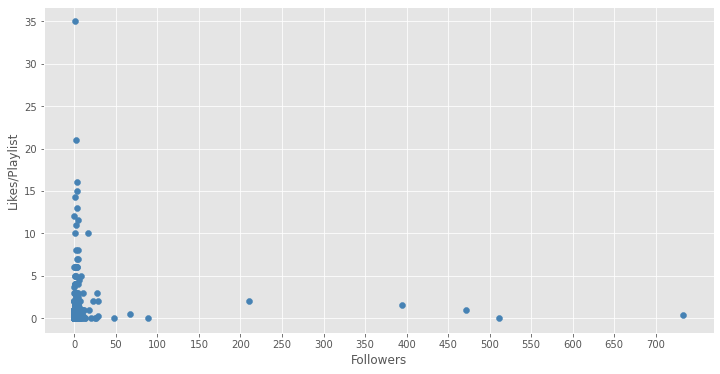

In [27]:
fig = plt.figure(figsize=(12,6))
plt.scatter(data['followers_count'], data['LikesPerPlaylist'], c='steelblue')
plt.xlabel('Followers')
plt.ylabel('Likes/Playlist')
plt.xticks(range(0,max(data['followers_count']),50))
plt.show()

Bây giờ, ta sẽ xét xem những người dùng phổ thông thì liệu có thể tạo ra những playlist chất lượng cho cộng đồng hay không.Có thể thấy trong biểu đồ trên, lượng user có số lượng follower lớn (tạm xét ở mức >50 followers) là không nhiều, nhìn bằng mắt thường cũng có thể thấy chỉ khoảng 7 người. Điều này cho thấy trong bộ dữ liệu thu thập được không có những nghệ sĩ hay những người nổi tiếng, những người có thể thu hút nhiều thính giả hơn, mà hầu hết chỉ là những người dùng bình thường, có lượng follower rất thấp. Như vậy, dự đoán của ta về user trong tập dữ liệu này là đúng. 

Do số lượng users có follower lớn không quá nhiều nên ta sẽ loại bỏ những user này và xét những user có số lượng follower dưới 50.

In [28]:
normal_users=data.drop(data[data['followers_count']>=50].index)

Tiếp theo, ta sẽ vẽ biểu đồ tương quan giữa `followers_count` và `LikesPerPlaylist`.

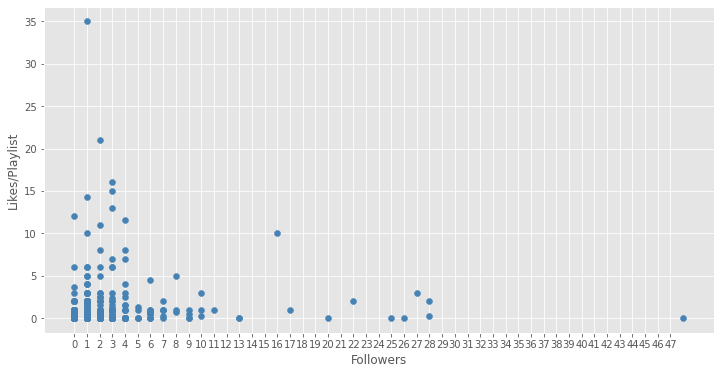

In [29]:
fig = plt.figure(figsize=(12,6))
plt.scatter(normal_users['followers_count'], normal_users['LikesPerPlaylist'], c='steelblue')
plt.xlabel('Followers')
plt.ylabel('Likes/Playlist')
plt.xticks(range(0,max(normal_users['followers_count']),1))
plt.show()

Như vậy, có thể thấy rõ hơn rằng, số lượng followers của các users trên thực tế chỉ tập trung ở mức dưới 10. Và những users này cũng chỉ có lượng LikesPerPlaylist tập trung ở mức dưới 20. Chỉ có 1 vài ngoại lệ duy nhất có số lượng Likes/Playlist là lớn.

Ta sẽ thực hiện loại bỏ các outlier của mỗi nhóm bằng phương pháp 2 STD và tính trung bình của mỗi nhóm này.

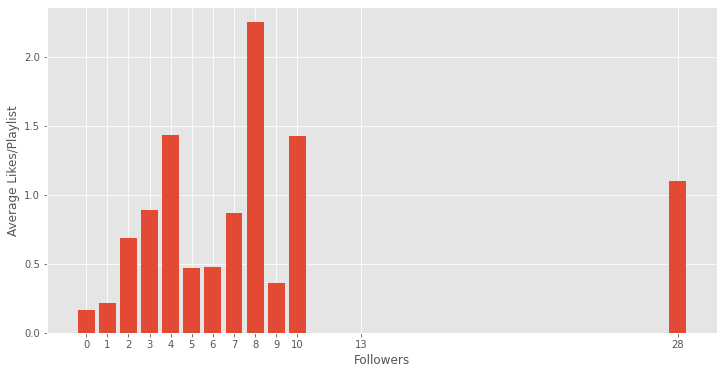

In [30]:
plt.figure(figsize=(12,6))
# Loại bỏ các outlier
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
#     Q1, Q3 = s.quantile(0.25), s.quantile(0.75)
#     IQR = Q3 - Q1
#     cut_off = IQR * 1.5
#     lower_limit, upper_limit = Q1 - cut_off, Q3 + cut_off
    return ~s.between(lower_limit, upper_limit)
stat = normal_users[~normal_users.groupby('followers_count')['LikesPerPlaylist'].apply(is_outlier)]
# Tính trung bình
stat=stat.groupby('followers_count').mean().reset_index()
# Vẽ đồ thị
plt.xticks(stat['followers_count'])
plt.xlabel('Followers')
plt.ylabel('Average Likes/Playlist')
plt.bar(stat['followers_count'],stat['LikesPerPlaylist']);

Như vậy, đến đây chúng ta có thể rút ra một vài kết luận:
- Mặt bằng chung thì số lượng like trên mỗi playlist ở nhóm user dưới 50 follower là khá thấp và chênh lệch gần như không đáng kể nếu số lượng follower thay đổi trong khoảng này.
- Trong bộ dữ liệu đang xét, chỉ có duy nhất một ngoại lệ (35 likes/playlist/2-follower) cho thấy việc dù được ít follower nhưng vẫn có số lượng lượt thích trung bình trên các playlist là lớn (nếu so với mặt bằng chung của nhóm user đang xét).
- Với những user có lượng follower lớn hơn nhóm đã xét ở trên, chúng ta chưa thể có kết luận rằng số likes/playlist có lớn hơn hay không.

Quay trở lại câu hỏi ban đầu, kết hợp với dữ liệu đã phân tích, chúng ta chỉ có thể trả lời rằng ở mức follower thấp thì chất lượng các playlist là thấp, nhưng không kết luận được sự ảnh hưởng số lượng follower đến điều này.

## **IV. Mối quan hệ giữa thời gian đăng, mức độ tương tác và số lượt nghe của bài hát**
Câu hỏi:
1. Một bài hát có thời gian đăng đã lâu thì có nhiều lượt tương tác hơn bài hát mới được đăng gần đây hay không? Có khoảng thời gian nào mà những bài hát được đăng vào thời điểm đó có lượng tương tác cao hơn những bài hát được đăng vào thời điểm khác không?
2. Một bài hát được repost (share lại) nhiều thì có giúp bài hát đó có nhiều lượt nghe hơn không?

* *Tương tác* của một bài hát ở đây sẽ được tính bằng tổng *like*, *comment*, *repost (lượt share)*, *playback (lượt nghe)*

Người thực hiện: Lương Ánh Nguyệt - 19120315

Dữ liệu sử dụng: tracks.csv (dữ liệu thu thập bằng API trong đồ án 1)

### Lấy dữ liệu

In [31]:
df = pd.read_csv('data/tracks.csv')
df.head()

,id,title,artwork_url,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,kind,label_name,last_modified,license,likes_count,permalink,permalink_url,playback_count,public,publisher_metadata,purchase_title,purchase_url,release_date,reposts_count,secret_token,sharing,state,streamable,tag_list,track_format,uri,urn,user_id,visuals,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy,user
0,226690288,"Rain Sounds - Sound Of Rain Nature Sounds, Rai...",https://i1.sndcdn.com/artworks-000175332551-ed...,NaN,True,771.0,2015-10-03T05:10:51Z,Sounds of rainfall with a cool space picture. ...,False,0.0,3609911,3609911,all,Rain,False,track,NaN,2021-08-24T07:05:34Z,all-rights-reserved,17256.0,rain-sounds-sound-of-rain-mp3-nature-soundsrai...,https://soundcloud.com/pineapplealien/rain-sou...,2319265.0,True,"{'id': 226690288, 'urn': 'soundcloud:tracks:22...",NaN,NaN,NaN,1236,NaN,public,finished,True,"turd monkeyfist rain ambient white noise ""whit...",single-track,https://api.soundcloud.com/tracks/226690288,soundcloud:tracks:226690288,123834756,NaN,https://wave.sndcdn.com/E4c0Gu2NfHm6_m.json,2015-10-03T05:10:51Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:226...,track-stations:226690288,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,BLACKBOX,MONETIZE,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
1,326671907,Ocean Waves 4 - Ocean Waves Natural White Nois...,https://i1.sndcdn.com/artworks-bZJG5aa0IZyZ-0-...,NaN,True,3.0,2017-06-06T16:50:10Z,NaN,False,0.0,3868026,3868026,all,World,False,track,Equilibrium,2017-06-06T16:53:36Z,all-rights-reserved,1030.0,ocean-waves-4-ocean-waves,https://soundcloud.com/sonidosdelanaturalezare...,229768.0,True,"{'id': 326671907, 'urn': 'soundcloud:tracks:32...",NaN,NaN,2011-02-16T00:00:00Z,16,NaN,public,finished,True,"Instrumental ""New Age""",single-track,https://api.soundcloud.com/tracks/326671907,soundcloud:tracks:326671907,311526979,NaN,https://wave.sndcdn.com/cRd1WjKS0uPz_m.json,2011-02-16T00:00:00Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:326...,track-stations:326671907,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,AD_SUPPORTED,MONETIZE,{'avatar_url': 'https://a1.sndcdn.com/images/d...
2,229953143,SOM DE CHUVA SOUND OF RAIN RELAX 30 MINUTES [B...,https://i1.sndcdn.com/artworks-000133852055-27...,NaN,True,900.0,2015-10-25T02:13:50Z,NaN,False,0.0,2066949,2066949,all,NaN,False,track,NaN,2021-09-11T08:02:44Z,all-rights-reserved,13982.0,som-de-chuva-sound-of-rain,https://soundcloud.com/lyssonastos/som-de-chuv...,1945725.0,True,NaN,NaN,NaN,NaN,995,NaN,public,finished,True,soundcloud:source=android-3rdparty-upload,single-track,https://api.soundcloud.com/tracks/229953143,soundcloud:tracks:229953143,109922318,NaN,https://wave.sndcdn.com/GYyQoGYiXnwX_m.json,2015-10-25T02:13:50Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:229...,track-stations:229953143,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
3,6768788,Sound of Rain,https://i1.sndcdn.com/artworks-000002938007-9e...,NaN,True,275.0,2010-11-07T01:36:05Z,Sleep better and relax with the sound of rain.,False,0.0,2063230,2063230,all,Effect,False,track,NaN,2021-10-21T01:22:33Z,all-rights-reserved,12002.0,sound-of-rain,https://soundcloud.com/irobert_ro/sound-of-rain,1611617.0,True,NaN,NaN,NaN,NaN,1096,NaN,public,finished,True,Sound of Rain Sleep better and relax DrogulPer...,single-track,https://api.soundcloud.com/tracks/6768788,soundcloud:tracks:6768788,1991518,NaN,https://wave.sndcdn.com/fY87ipEt5bUp_m.json,2010-11-07T01:36:05Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:676...,track-stations:6768788,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO.

### 1. Mối quan hệ giữa thời gian đăng và độ tương tác của bài hát

### Tiền xử lý

* Trong phần này, ta chỉ lấy dữ liệu từ cột `created_at`,`comment_count`, `likes_count`,`playback_count` và `reposts_count`.

In [32]:
data = df.loc[:,['created_at','comment_count','likes_count','playback_count','reposts_count']]
data

,created_at,comment_count,likes_count,playback_count,reposts_count
0,2015-10-03T05:10:51Z,771.0,17256.0,2319265.0,1236
1,2017-06-06T16:50:10Z,3.0,1030.0,229768.0,16
2,2015-10-25T02:13:50Z,900.0,13982.0,1945725.0,995
3,2010-11-07T01:36:05Z,275.0,12002.0,1611617.0,1096
4,2015-04-24T07:15:34Z,87.0,3101.0,639937.0,154
...,...,...,...,...,...
996,2020-07-08T23:48:09Z,14.0,378.0,18547.0,3
997,2020-06-10T15:08:35Z,81.0,2264.0,105220.0,34
998,2012-04-26T22:19:41Z,31.0,3006.0,336781.0,190
999,2015-05-14T01:05:32Z,6.0,1551.0,127907.0,61


* Kiểm tra xem liệu có dữ liệu trống không? (missing values)

In [33]:
data.isna().sum()

created_at        0
comment_count     3
likes_count       1
playback_count    1
reposts_count     0
dtype: int64

Vì missing values chỉ chiếm 1 phần rất nhỏ (3/1000 dữ liệu) nên ta loại bỏ luôn những dòng có missing values.

In [34]:
data.dropna(inplace=True)

* Tiếp theo, ta kiểm tra kiểu dữ liệu của các cột.

In [35]:
data.dtypes

created_at         object
comment_count     float64
likes_count       float64
playback_count    float64
reposts_count       int64
dtype: object

Để dễ dàng làm việc và nhìn dữ liệu được đẹp hơn, ta nên chuyển cột `created_at` về kiểu `datetime` (chỉ cần lấy ngày tháng năm, không cần lấy thời gian), và các cột `comment_count`, `likes_count`, `playback_count` thành kiểu `int`.

In [36]:
data = data.astype({'created_at':np.datetime64, 'comment_count':np.int64, 'likes_count':np.int64, 'playback_count':np.int64})
data.created_at = data.created_at.dt.normalize()
data.dtypes

created_at        datetime64[ns]
comment_count              int64
likes_count                int64
playback_count             int64
reposts_count              int64
dtype: object

* Ta không sử dụng riêng từng cột `comment_count`, `likes_count`, `playback_count`, `reposts_count` mà cần tính tổng chúng lại để đánh giá thành mức độ tương tác của bài hát, đặt làm cột `interactions`.
* Cột `time` lưu số ngày kể từ lúc bài hát được tạo (created_at) đến thời điểm hiện tại (lấy ngày `12-12-2021`, thời điểm đồ án này được thực hiện)

In [37]:
data['time'] = (np.datetime64('2021-12-12') - data['created_at']).dt.days
data['interactions'] = [0]*len(data.index)
for col in ['comment_count', 'likes_count', 'playback_count', 'reposts_count']:
    data['interactions'] = data['interactions'].add(data[col])
data

,created_at,comment_count,likes_count,playback_count,reposts_count,time,interactions
0,2015-10-03,771,17256,2319265,1236,2262,2338528
1,2017-06-06,3,1030,229768,16,1650,230817
2,2015-10-25,900,13982,1945725,995,2240,1961602
3,2010-11-07,275,12002,1611617,1096,4053,1624990
4,2015-04-24,87,3101,639937,154,2424,643279
...,...,...,...,...,...,...,...
996,2020-07-08,14,378,18547,3,522,18942
997,2020-06-10,81,2264,105220,34,550,107599
998,2012-04-26,31,3006,336781,190,3517,340008
999,2015-05-14,6,1551,127907,61,2404,129525


### Phân tích dữ liệu

Ta có biểu đồ phân tán giữa 2 thuộc tính `time` và `interactions` như sau:

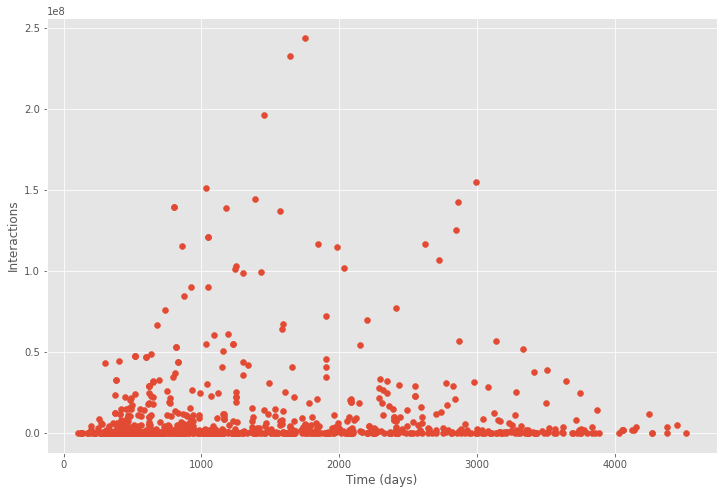

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(data['time'], data['interactions'])
plt.xlabel('Time (days)')
plt.ylabel('Interactions')
plt.show()

Với biểu đồ phân tán trên, ta có thể trả lời cho câu hỏi 1 và rút ra một số nhận xét như sau:
* Một bài hát có thời gian đăng đã lâu **không có nghĩa** là bài đó sẽ có nhiều lượt tương tác hơn bài hát mới được đăng.
* Bài hát đã được đăng rất lâu (cách đây 10-11 năm ~ khoảng hơn 4000 ngày) thì có lượng tương tác rất ít. Có thể vào khoảng thời gian đó, Soundcloud chưa được phổ biến nên chưa có nhiều người dùng để tương tác. Và đến thời điểm hiện tại, những bài hát đó quá xưa cũ nên cũng ít người biết đến, khó có thể tăng tương tác.
* **Những bài hát có lượt tương tác cao vượt trội nằm trong khoảng cách đây 3-5 năm (~ 1000-2000 ngày)**. Điều này có thể xem là hợp lý vì vào khoảng thời gian đó là lúc công nghệ đã trở nên phổ biến, có nhiều người dùng dẫn đến nhiều tương tác hơn, và lượng tương tác đó sẽ được tích lũy dần qua thời gian.
* Tuy nhiên, ta cũng **không thể khẳng định** những bài hát được đăng trong khoảng thời gian cách đây 3-5 năm thì sẽ có tương tác cao hơn những bài hát được đăng vào khoảng thời gian khác, vì những bài hát có lượng tương tác cao hơn hẳn chỉ là số ít, và số lượt tương tác còn tùy thuộc vào độ phổ biến, độ hay dở,... của bài hát.
* **Phần lớn các bài hát đều có khoảng < 40 triệu lượt tương tác, không phân biệt thời gian bài hát được đăng là khi nào** (các điểm tụ tập nhiều và trải dài ở dưới đáy biểu đồ).

### 2. Mối quan hệ giữa lượt chia sẻ (repost) và lượt nghe (playback) của bài hát

### Tiền xử lý

Trong phần này, ta sẽ lấy dữ liệu từ cột `playback_count` và `reposts_count` để phân tích

In [39]:
data = df.loc[:,['playback_count','reposts_count']]
data

,playback_count,reposts_count
0,2319265.0,1236
1,229768.0,16
2,1945725.0,995
3,1611617.0,1096
4,639937.0,154
...,...,...
996,18547.0,3
997,105220.0,34
998,336781.0,190
999,127907.0,61


* Ta kiểm tra xem có missing values không?

In [40]:
data.isna().sum()

playback_count    1
reposts_count     0
dtype: int64

Chỉ có 1 dữ liệu bị thiếu nên ta sẽ loại bỏ luôn dòng dữ liệu này đi.

In [41]:
data.dropna(inplace=True)

* Quan sát qua dữ liệu, ta thấy được cột `playback_count` thuộc kiểu `float`. Ta nên chuyển nó về kiểu `integer` để khi biểu diễn được dễ nhìn.

In [42]:
data = data.astype({'playback_count':np.int64})
data.dtypes

playback_count    int64
reposts_count     int64
dtype: object

### Phân tích dữ liệu

* Biểu đồ phân tán giữa *repost (lượt chia sẻ)* và *playback (lượt nghe)*:

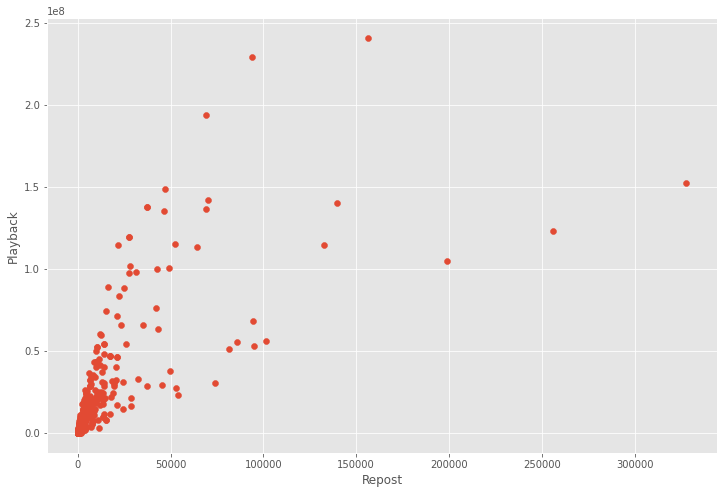

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(data['reposts_count'], data['playback_count'])
plt.xlabel('Repost')
plt.ylabel('Playback')
plt.show()

Qua biểu đồ trên, ta thấy được có một số bài hát có lượng repost quá cao. Điều này đã dẫn đến việc biểu đồ bị lệch về phía bên trái, khiến ta khó có thể quan sát và nhận xét.

Vì vậy, chúng ta cần phải loại bỏ đi outliers. Ở đây, ta sử dụng phương pháp dùng **khoảng tứ phân vị** (Interquartile Range Method)

In [44]:
# IQR
Q1 = data['reposts_count'].quantile(0.25)
Q3 = data['reposts_count'].quantile(0.75)
IQR = Q3 - Q1
x = IQR * 1.5
repost_start = Q1 - x
repost_end = Q3 + x

# Loại bỏ outlier
data = data[((data['reposts_count']>=repost_start) & (data['reposts_count']<=repost_end))]

* Biểu đồ mới sau khi loại bỏ outlier:

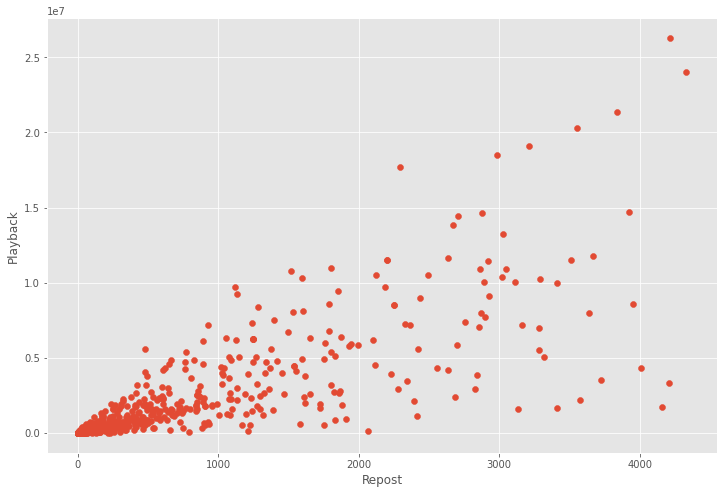

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(data['reposts_count'], data['playback_count'])
plt.xlabel('Repost')
plt.ylabel('Playback')
plt.show()

Quan sát biểu đồ mới, ta trả lời được câu hỏi 2 và có những nhận xét sau:
* Bài hát có lượng repost cao **không** giúp cho bài hát có nhiều lượt playback hơn.
* Những bài hát có số lượt nghe lớn (hơn 15 triệu lượt playback) **có thể** cũng có số lượng repost cao. Tuy nhiên đây chỉ là số lượng nhỏ (chỉ có vài điểm trên biểu đồ) trong mẫu thu thập được nên không thể đưa ra kết luận chính xác.
* Bài hát có lượng repost ít hơn 1000 thường cũng sẽ có số lượt playback nhỏ hơn 5 triệu, và đa số các bài hát từ dữ liệu thu thập được đều nằm trong khoảng repost và playback này.

### 3. Kết luận

1. Một bài hát có thời gian đăng đã lâu thì có nhiều lượt tương tác hơn bài hát mới được đăng gần đây hay không?
> **Không**. Bài hát đã được đăng lâu không đồng nghĩa với việc nó sẽ có nhiều lượt tương tác hơn bài hát mới được đăng.

* Có khoảng thời gian nào mà những bài hát được đăng vào thời điểm đó có lượng tương tác cao hơn những bài hát được đăng vào thời điểm khác không?
> **Chưa chắc chắn**. Ở mẫu đang xét, tuy những bài hát tương tác cao nằm trong khoảng cách đây 3-5 năm, nhưng đây chỉ là số ít và mẫu cũng không lớn. Hơn nữa, **hầu hết các bài hát đều có lượng tương tác nằm trong khoảng giống nhau, bất kể được đăng vào thời gian nào**. Vì vậy không thể kết luận được gì.

2. Một bài hát được repost (share lại) nhiều thì có giúp bài hát đó có nhiều lượt nghe hơn không?
> **Không**. Tuy nhiên, nếu bài hát có ít hơn 1000 repost thì **có thể** số playback của nó không quá 5 triệu.